# /*******************************************************
* Copyright         : 2023 Vaibhav Khandare
* Description       : This file content is detect car image and then predict its brand 
*                    
* Revision History  :
* 		Author 		
        Vaibhav Khandare 
* ------------------------------------------------------------------
/******************************************************************/

In [ ]:
import pandas as pd 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from os import listdir

In [86]:
brand = listdir('./imgs/')

In [3]:
brand

['Acura',
 'Alfa Romeo',
 'Aston Martin',
 'Audi',
 'Bentley',
 'BMW',
 'Bugatti',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'Daewoo',
 'Dodge',
 'Ferrari',
 'Fiat',
 'Ford',
 'Genesis',
 'GMC',
 'Honda',
 'Hudson',
 'Hyundai',
 'Infiniti',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'MG',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Peugeot',
 'Pontiac',
 'Porsche',
 'Ram Trucks',
 'Renault',
 'Saab',
 'Studebaker',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [4]:
img = cv.imread('./imgs/Acura/Acura_001.jpg')

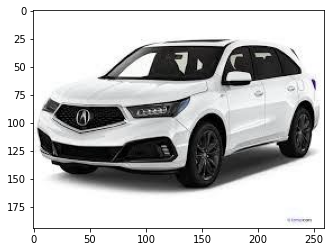

In [5]:
plt.imshow(img)

In [6]:
img.shape

(194, 259, 3)

In [7]:
def ds(data):
    X = []
    y = []
    for i in listdir(data):
        for j in listdir(data +  i):
            img = cv.imread(data + i +'/'+j)
            img = cv.resize(img,(200,200))
            X.append(img)
            y.append(i)
    return np.array(X) ,  np.array(y)        

In [8]:
trainX, trainy = ds('./imgs/')

In [9]:
len(trainX)

4597

In [10]:
len(trainy)

4597

In [11]:
trainX.shape

(4597, 200, 200, 3)

In [12]:
trainy.shape

(4597,)

In [13]:
trainX

array([[[[209, 235, 249],
         [208, 234, 248],
         [203, 232, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[208, 234, 248],
         [206, 233, 247],
         [203, 231, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[206, 232, 248],
         [204, 231, 247],
         [202, 230, 245],
         ...,
         [ 76, 108, 167],
         [ 76, 108, 167],
         [ 76, 108, 167]],

        ...,

        [[ 92, 149, 188],
         [ 88, 145, 184],
         [ 84, 141, 180],
         ...,
         [ 12,  38,  58],
         [ 14,  39,  59],
         [ 14,  39,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
         [ 14,  42,  59],
         [ 14,  42,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
        

In [14]:
phatu = trainX[200]

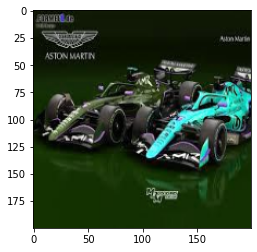

In [15]:
plt.imshow(phatu)

In [16]:
phatu1 = trainX[193]

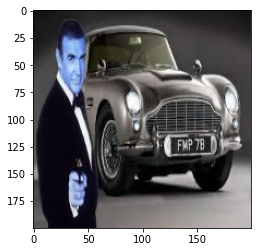

In [17]:
plt.imshow(phatu1)

In [18]:
p = trainy[200]

In [19]:
trainy

array(['Acura', 'Acura', 'Acura', ..., 'Volvo', 'Volvo', 'Volvo'],
      dtype='<U13')

In [20]:
trainy_cat = pd.get_dummies(trainy)

In [21]:
trainy_cat

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Ram Trucks,Renault,Saab,Studebaker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
trainy_cat.shape

(4597, 50)

In [23]:
import keras
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape=(200,200,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2))) #strides means steps 

# Fully connected layers (w/ RELU)
model.add(Flatten())
          
# FC NN
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(50))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 20)      1520      
_________________________________________________________________
activation (Activation)      (None, 200, 200, 20)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 50)      25050     
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 50)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 125000)            0

In [24]:
trainX

array([[[[209, 235, 249],
         [208, 234, 248],
         [203, 232, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[208, 234, 248],
         [206, 233, 247],
         [203, 231, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[206, 232, 248],
         [204, 231, 247],
         [202, 230, 245],
         ...,
         [ 76, 108, 167],
         [ 76, 108, 167],
         [ 76, 108, 167]],

        ...,

        [[ 92, 149, 188],
         [ 88, 145, 184],
         [ 84, 141, 180],
         ...,
         [ 12,  38,  58],
         [ 14,  39,  59],
         [ 14,  39,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
         [ 14,  42,  59],
         [ 14,  42,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
        

In [25]:
X_train_real = np.array(trainX)

In [26]:
X_train_real

array([[[[209, 235, 249],
         [208, 234, 248],
         [203, 232, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[208, 234, 248],
         [206, 233, 247],
         [203, 231, 245],
         ...,
         [ 77, 109, 168],
         [ 79, 109, 168],
         [ 79, 109, 168]],

        [[206, 232, 248],
         [204, 231, 247],
         [202, 230, 245],
         ...,
         [ 76, 108, 167],
         [ 76, 108, 167],
         [ 76, 108, 167]],

        ...,

        [[ 92, 149, 188],
         [ 88, 145, 184],
         [ 84, 141, 180],
         ...,
         [ 12,  38,  58],
         [ 14,  39,  59],
         [ 14,  39,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
         [ 14,  42,  59],
         [ 14,  42,  59]],

        [[ 84, 140, 181],
         [ 86, 142, 183],
         [ 87, 143, 184],
         ...,
         [ 15,  43,  60],
        

In [27]:
model.fit( X_train_real , trainy_cat,epochs=50)

Epoch 1/50
144/144 [==============================] - 180s 1s/step - loss: 40.6835 - accuracy: 0.0227
Epoch 2/50
144/144 [==============================] - 169s 1s/step - loss: 22.6403 - accuracy: 0.0296
Epoch 3/50
144/144 [==============================] - 163s 1s/step - loss: 17.5450 - accuracy: 0.0380
Epoch 4/50
144/144 [==============================] - 163s 1s/step - loss: 14.8778 - accuracy: 0.0404
Epoch 5/50
144/144 [==============================] - 166s 1s/step - loss: 13.0651 - accuracy: 0.0514
Epoch 6/50
144/144 [==============================] - 161s 1s/step - loss: 11.3498 - accuracy: 0.0634
Epoch 7/50
144/144 [==============================] - 162s 1s/step - loss: 10.2701 - accuracy: 0.0709
Epoch 8/50
144/144 [==============================] - 161s 1s/step - loss: 9.3966 - accuracy: 0.0825
Epoch 9/50
144/144 [==============================] - 164s 1s/step - loss: 8.5582 - accuracy: 0.0914
Epoch 10/50
144/144 [==============================] - 162s 1s/step - loss: 7.9211 -

In [31]:
model.save('car_reco200X200_car.h5')

In [33]:
test = cv.imread('./imgs/Audi/Audi_060.jpg')
test = cv.resize(test ,(200,200))
test = test.reshape(1,200,200,3)

In [34]:
p = model.predict(test)

In [35]:
p

array([[3.99558132e-07, 4.23711072e-06, 1.80494294e-06, 9.96319652e-01,
        7.30019610e-06, 7.02198711e-04, 5.83421852e-11, 8.66531569e-11,
        2.44672094e-07, 6.26403289e-06, 1.00110071e-08, 9.55953783e-06,
        4.49697400e-04, 1.34442541e-06, 3.54782429e-07, 1.46575030e-05,
        8.34155217e-05, 5.43707210e-06, 2.15902401e-05, 3.17015219e-04,
        1.75620247e-08, 1.25553890e-09, 1.19496257e-09, 1.20484788e-06,
        1.65182655e-07, 8.25358948e-05, 4.23839374e-05, 1.08620025e-05,
        1.03357679e-03, 1.17868194e-06, 2.15977849e-08, 3.49507957e-11,
        2.69846496e-04, 1.17937397e-07, 1.51548815e-10, 3.33539560e-08,
        5.02555671e-11, 2.37939712e-05, 1.05024817e-07, 8.22753464e-06,
        4.49857765e-07, 5.89416800e-08, 7.54062276e-05, 5.39702623e-11,
        3.57287936e-04, 1.26289126e-06, 1.46415274e-04, 3.80938836e-08,
        2.87679374e-08, 1.54489737e-11]], dtype=float32)

In [36]:
p = p*100

In [37]:
p

array([[3.9955812e-05, 4.2371108e-04, 1.8049429e-04, 9.9631966e+01,
        7.3001959e-04, 7.0219874e-02, 5.8342184e-09, 8.6653156e-09,
        2.4467210e-05, 6.2640331e-04, 1.0011007e-06, 9.5595379e-04,
        4.4969741e-02, 1.3444254e-04, 3.5478242e-05, 1.4657503e-03,
        8.3415518e-03, 5.4370723e-04, 2.1590241e-03, 3.1701520e-02,
        1.7562024e-06, 1.2555390e-07, 1.1949626e-07, 1.2048479e-04,
        1.6518265e-05, 8.2535893e-03, 4.2383936e-03, 1.0862002e-03,
        1.0335768e-01, 1.1786819e-04, 2.1597784e-06, 3.4950796e-09,
        2.6984649e-02, 1.1793740e-05, 1.5154882e-08, 3.3353956e-06,
        5.0255569e-09, 2.3793972e-03, 1.0502482e-05, 8.2275347e-04,
        4.4985776e-05, 5.8941678e-06, 7.5406227e-03, 5.3970264e-09,
        3.5728794e-02, 1.2628913e-04, 1.4641527e-02, 3.8093883e-06,
        2.8767938e-06, 1.5448973e-09]], dtype=float32)

In [51]:
count = 0
result=[]
p=p.reshape(50,1)

In [66]:
def find_maximum( list ):
    max = list[ 0 ]
    k=0
    for a in list:
        if a > max:
            max = a
            b=k
        k=k+1    
    return max , b 


In [53]:
result , call = find_maximum(p)

In [54]:
result

array([99.631966], dtype=float32)

In [55]:
p[0]

array([3.9955812e-05], dtype=float32)

In [56]:
p[1]

array([0.00042371], dtype=float32)

In [57]:
p[3]

array([99.631966], dtype=float32)

In [58]:
print(call)

3


In [80]:
k = 0
def find_max(list):
    max = list[0]
    k = 0
    for i in list:
        if i > max:
            max =i
            b=k
        k = k+1
    return max, b    
            

In [81]:
result , b = find_max(p)

In [82]:
result 

array([99.631966], dtype=float32)

In [83]:
b

3

In [84]:
call

3

In [88]:
brand[call]

'Audi'

In [89]:
brand[b]

'Audi'

In [90]:
p

array([[3.9955812e-05],
       [4.2371108e-04],
       [1.8049429e-04],
       [9.9631966e+01],
       [7.3001959e-04],
       [7.0219874e-02],
       [5.8342184e-09],
       [8.6653156e-09],
       [2.4467210e-05],
       [6.2640331e-04],
       [1.0011007e-06],
       [9.5595379e-04],
       [4.4969741e-02],
       [1.3444254e-04],
       [3.5478242e-05],
       [1.4657503e-03],
       [8.3415518e-03],
       [5.4370723e-04],
       [2.1590241e-03],
       [3.1701520e-02],
       [1.7562024e-06],
       [1.2555390e-07],
       [1.1949626e-07],
       [1.2048479e-04],
       [1.6518265e-05],
       [8.2535893e-03],
       [4.2383936e-03],
       [1.0862002e-03],
       [1.0335768e-01],
       [1.1786819e-04],
       [2.1597784e-06],
       [3.4950796e-09],
       [2.6984649e-02],
       [1.1793740e-05],
       [1.5154882e-08],
       [3.3353956e-06],
       [5.0255569e-09],
       [2.3793972e-03],
       [1.0502482e-05],
       [8.2275347e-04],
       [4.4985776e-05],
       [5.894167

In [91]:
type(p)

numpy.ndarray

In [92]:
test = cv.imread('./imgs/Aston Martin/Aston Martin_023.jpg')


In [95]:
test

array([[[232, 211, 203],
        [232, 211, 203],
        [232, 211, 203],
        ...,
        [195, 170, 168],
        [194, 169, 167],
        [193, 169, 169]],

       [[232, 211, 203],
        [232, 211, 203],
        [232, 211, 203],
        ...,
        [193, 168, 166],
        [191, 168, 166],
        [196, 172, 172]],

       [[231, 212, 204],
        [231, 212, 204],
        [231, 212, 204],
        ...,
        [197, 174, 172],
        [200, 177, 175],
        [190, 166, 166]],

       ...,

       [[ 78,  79,  99],
        [ 77,  78,  98],
        [ 76,  77,  97],
        ...,
        [ 54,  57,  72],
        [ 54,  57,  72],
        [ 49,  52,  67]],

       [[ 78,  79,  99],
        [ 76,  80,  99],
        [ 76,  77,  97],
        ...,
        [ 54,  57,  72],
        [ 54,  57,  72],
        [ 55,  58,  73]],

       [[ 71,  74,  95],
        [ 69,  74,  95],
        [ 71,  74,  95],
        ...,
        [ 51,  54,  69],
        [ 52,  55,  70],
        [ 54,  57,  72]]

In [97]:
test = cv.resize(test ,(200,200))

In [98]:
test = test.reshape(1,200,200,3)

In [99]:
test.shape

(1, 200, 200, 3)

In [127]:
p1 = model.predict(test)

In [128]:
p1

array([[1.33642698e-05, 2.28390199e-05, 9.82180357e-01, 6.68168559e-06,
        4.43095516e-04, 9.95151026e-07, 6.26072113e-04, 6.02986074e-05,
        8.33854210e-05, 2.24108086e-03, 3.27714988e-05, 2.18676743e-09,
        1.06926549e-04, 1.90721737e-04, 1.42422948e-10, 2.71196512e-07,
        9.51555492e-08, 6.18927470e-06, 5.25478754e-08, 4.42250496e-07,
        3.45778034e-07, 2.72538784e-07, 5.22298222e-08, 4.48629498e-06,
        3.52602292e-05, 2.61884747e-06, 2.96565158e-05, 3.03368317e-08,
        1.26622508e-08, 1.04210096e-06, 4.75718309e-07, 1.54076319e-03,
        5.02163603e-05, 1.00495527e-02, 1.01115356e-05, 1.12184374e-07,
        5.17020089e-05, 8.06250995e-08, 1.43730063e-07, 4.02235804e-04,
        5.92034212e-07, 4.59657286e-07, 1.56458775e-08, 1.27176785e-08,
        1.60816762e-05, 1.01298603e-04, 1.32300844e-03, 6.54378482e-07,
        3.60728649e-04, 2.51869869e-06]], dtype=float32)

In [132]:
count = 0
result=[]
p1=p1.reshape(50,1)

In [133]:
def find_max( list ):
    max = list[ 0 ]
    k=0
    for a in list:
        if a > max:
            max = a
            b=k
        k=k+1    
    return max , b
 

In [134]:
result , b = find_max(p1)

In [135]:
result

array([0.98218036], dtype=float32)

In [137]:
brand[b]

'Aston Martin'

In [146]:
test = cv.imread('./imgs/BMW/BMW_025.jpg')
test = cv.resize(test ,(200,200))
test = test.reshape(1,200,200,3)
p2 = model.predict(test)
count = 0
result=[]
p2=p2.reshape(50,1)
def find_max( list ):
    max = list[ 0 ]
    k=0
    for a in list:
        if a > max:
            max = a
            b=k
        k=k+1    
    return max , b
 

In [147]:
p2

array([[1.3110430e-07],
       [2.0335799e-06],
       [4.3135461e-08],
       [3.1454036e-07],
       [9.9319035e-01],
       [4.2026215e-05],
       [3.8974185e-06],
       [1.0262896e-05],
       [3.4231092e-05],
       [1.7337293e-06],
       [3.6517467e-04],
       [3.2332155e-06],
       [1.6914605e-07],
       [3.1588075e-05],
       [1.2642673e-07],
       [1.1845269e-07],
       [1.0130061e-06],
       [1.3258560e-05],
       [7.3198413e-07],
       [3.6082713e-06],
       [3.8369176e-06],
       [2.3466608e-07],
       [5.4611271e-05],
       [4.6183536e-07],
       [3.6140071e-05],
       [9.0105468e-06],
       [1.4990848e-06],
       [4.4104038e-07],
       [1.3760174e-05],
       [3.4156223e-05],
       [2.9251037e-06],
       [1.4306243e-05],
       [4.5025114e-05],
       [1.7531150e-07],
       [7.2477205e-06],
       [1.2026660e-04],
       [6.9672416e-04],
       [3.6768937e-03],
       [5.5779688e-09],
       [1.6117193e-08],
       [1.4130866e-08],
       [1.256650

In [148]:
result , b = find_max(p2)

In [149]:
result

array([0.99319035], dtype=float32)

In [150]:
b

4

In [151]:
brand[b]

'Bentley'